<a href="https://colab.research.google.com/github/gtechzilla/tensorflow_certification/blob/in_progress/blood_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# get the path of our data directory
data_dir = '/content/drive/MyDrive/Data_Science/cell_images'
os.listdir(data_dir)

['train', 'test']

In [4]:
#reading image files directly,this is because we have png files
from matplotlib.image import imread

In [5]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'
print(os.listdir(test_path))
print(os.listdir(train_path))

['parasitized', 'uninfected']
['uninfected', 'parasitized']


In [6]:
#viewing an infected image file
# imread converts the image to an array
sample_image = imread(train_path+'parasitized/'+os.listdir(train_path+'parasitized')[0])
sample_image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

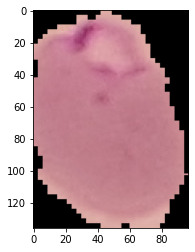

In [7]:
# viewing the actual image
plt.imshow(sample_image)

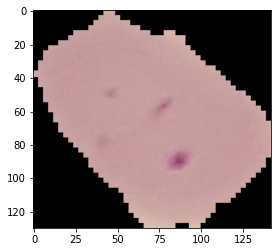

In [8]:
#viewing a random uninfected file image
sample_image = imread(train_path+'uninfected/'+os.listdir(train_path+'uninfected')[0])
plt.imshow(sample_image)

In [9]:
#checking the number of images in train data set
print('Number of train infected images > ', len(os.listdir(train_path+'parasitized')))
print('Number of train uninfected images > ', len(os.listdir(train_path+'uninfected')))

Number of train infected images >  12503
Number of train uninfected images >  12508


In [10]:
#checking the number of images in train data set
print('Number of test infected images > ', len(os.listdir(test_path+'parasitized')))
print('Number of test uninfected images > ', len(os.listdir(test_path+'uninfected')))


Number of test infected images >  1300
Number of test uninfected images >  1300


In [11]:
#checking on the image shapes
width = []
height = []
for image_file in os.listdir(train_path+'parasitized'):
    if image_file.endswith('.png'):
        image = imread(train_path+'parasitized/'+image_file)
        image_width,image_height,color_channel_count = image.shape
        width.append(image_width)
        height.append(image_height)
image_dimensions = pd.DataFrame({'width':width,'height':height}, columns=['width','height'])
image_dimensions.head()

KeyboardInterrupt: ignored

In [12]:
# from above we learn that our images have varying height and width dimensions
# our DL model will only accept a standard shape
# we shall have to resize our image
# in this case we shall resize our image to the mean image dimensions(130,130,3)
image_dimensions.describe()

NameError: ignored

In [ ]:
#this plot shows how the image width and height vary
sns.jointplot(x='width',y='height',data=image_dimensions)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# This performs data augumentation of our image
# when called,it randomly generates a new image based on the below parameters
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [15]:
#getting batches from our directory
# We have to organize the directories with overall image folder and a subfolder for each image class
image_gen.flow_from_directory(train_path)

Found 25009 images belonging to 2 classes.


In [16]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


In [18]:
image_shape = (130,130,3)
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [22]:
batch_size = 16

In [23]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 25009 images belonging to 2 classes.


In [24]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False )

Found 2600 images belonging to 2 classes.


In [25]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [26]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=early_stop)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1564/1564 [==============================] - 5034s 3s/step - loss: 2.7047 - accuracy: 0.5327 - val_loss: 0.6827 - val_accuracy: 0.5646
Epoch 2/20
1564/1564 [==============================] - 719s 460ms/step - loss: 0.6815 - accuracy: 0.5723 - val_loss: 0.6748 - val_accuracy: 0.5838
Epoch 3/20
1564/1564 [==============================] - 718s 459ms/step - loss: 0.6686 - accuracy: 0.5905 - val_loss: 0.6700 - val_accuracy: 0.5831
Epoch 4/20
1564/1564 [==============================] - 717s 458ms/step - loss: 0.6749 - accuracy: 0.5943 - val_loss: 0.6655 - val_accuracy: 0.5935
Epoch 5/20
1564/1564 [==============================] - 715s 457ms/step - loss: 0.6637 - accuracy: 0.6130 - val_loss: 0.6602 - val_accuracy: 0.6185
Epoch 6/20
1564/1564 [==============================] - 715s 457ms/step - loss: 0.6637 - accuracy: 0.6024 - val_loss: 0.6520 - val_accuracy: 0.6173
Epoch 7/20
1564/1564 [==============================] - 713s 456ms/step - loss: 0.6585 - accuracy: 0.6158 - val_lo

In [29]:
from sklearn.metrics import classification_report


In [28]:
pred = model.predict_generator(test_image_gen)
predictions = pred > 0.5
print(classification_report(test_image_gen.classes,predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



""
